<a href="https://colab.research.google.com/github/Urbanus-Kathitu/linkedin-skill-assessments-quizzes/blob/main/2022_Autolib_Electric_Car_Share_Moringa_Data_Science_Core_Week_7_Independant_Project_Urbanus_Kathitu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.**Introduction**

This weeks IP requires us to carry out a hypothesis test on a dataset. We will formulate our hypothesis and prepare our data to find evidence of null or alternate hypothesis.

Steps taken to implement a solution:

1) Load the dataset: Reading our data with an aim to understand the variables and columns.

2) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset.

3) Data cleaning: perform all the data cleaning and preparations to make data ready for analysis.

4) EDA: Use univariate analysis and bivariate analysis and visualized.

5) Generating a sample: Find the appropriate sampling technique and generate a sample to use in implementing the solution.

6) Implementing the solution by finding the z-test, t-test and the related p-values and finding out if it is smaller than or greater than the significance level.

7)Conclusion

**Formulating our hypothesis**

We have been tasked to understand electric car usag. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

Null hypothesis: The total unmber of BlueCars taken on a weekday is less than Autolib cars

Alternate Hypothesis: The total number of Blue cars taken are more than Autolib cars taken on a weekday.

The data set and variable definitions can be found below

http://bit.ly/DSCoreAutolibDataset

http://bit.ly/DSCoreAutolibDatasetGlossary

## **Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm


## **Loading the Dataset**
We first load the Dataset along with the column descriptions into the Notebook.

We then access information regarding the columns *in* the Dataset

In [ ]:
#Display the head of the dataset
df = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#Display the tail of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#Preview the glossary
descriptions = pd.read_excel('https://bit.ly/DSCoreAutolibDatasetGlossary')
descriptions

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
#Display our datasets Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#Check for the number of unique variablesin each field
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
#Show the shape of the dataset
df.shape

(16085, 13)

In [ ]:
#Show the column names
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There is no missing data in this dataset

In [ ]:
#Lets look at the unique postal codes
df['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

##**Data Cleaning**

In [ ]:
#Rename our data columns to ones we can easily work with
df.rename({'n_daily_data_points' : 'num_data_points', 'dayOfWeek' : 'day_of_week'
           }, axis=1, inplace=True)
df.columns

Index(['Postal code', 'date', 'num_data_points', 'day_of_week', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

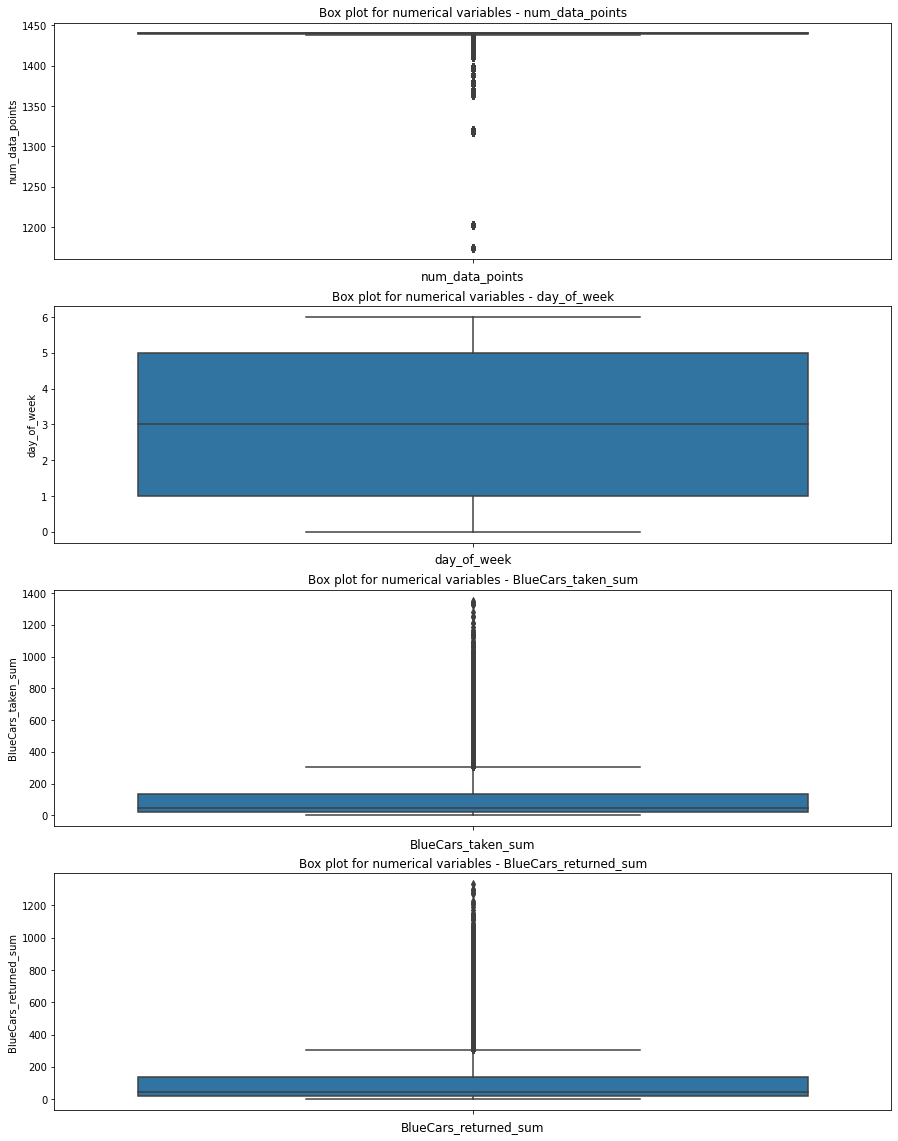

In [ ]:
#Lets check for Outliers
col_names= ['num_data_points', 'day_of_week', 'BlueCars_taken_sum', 'BlueCars_returned_sum']

fig, ax = plt.subplots(len(col_names), figsize=(15,20))

for i, col_val in enumerate(col_names):
    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

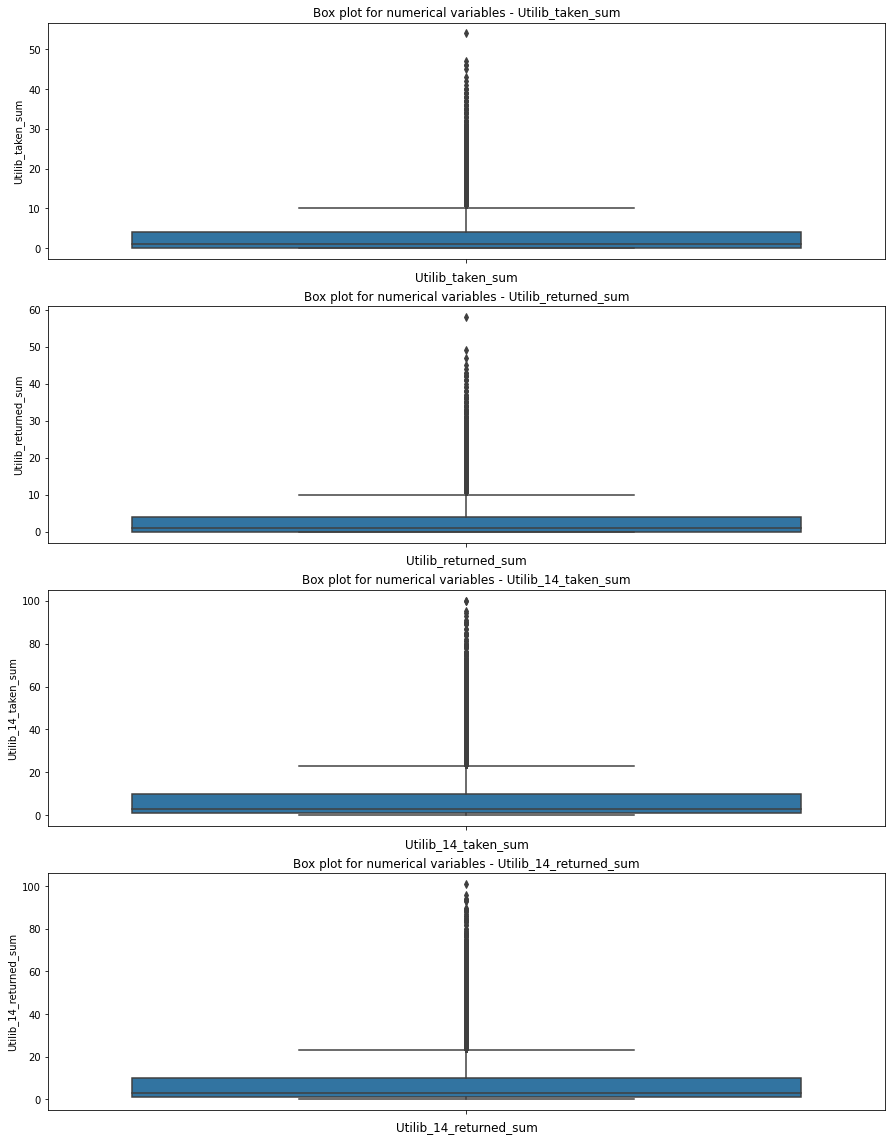

In [ ]:
#Lets check for Outliers(2)
col_names= ['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']
fig, ax = plt.subplots(len(col_names), figsize=(15,20))

for i, col_val in enumerate(col_names):
    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

# 2.Exploratory Data Analysis

## i) Univariate Analysis

We followed up by carrying out Univariate analysis on the columns of the Dataset.


In [ ]:
#We want to start off by getting the summary statistics
df.describe()

,Postal code,num_data_points,day_of_week,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
df[['num_data_points', 'day_of_week', 'BlueCars_taken_sum', 'BlueCars_returned_sum','Utilib_taken_sum',
    'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']].mean()


num_data_points           1431.330619
day_of_week                  2.969599
BlueCars_taken_sum         125.926951
BlueCars_returned_sum      125.912714
Utilib_taken_sum             3.698290
Utilib_returned_sum          3.699099
Utilib_14_taken_sum          8.600560
Utilib_14_returned_sum       8.599192
dtype: float64

In [ ]:
df[['num_data_points', 'day_of_week', 'BlueCars_taken_sum', 'BlueCars_returned_sum','Utilib_taken_sum',
    'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']].median()

num_data_points           1440.0
day_of_week                  3.0
BlueCars_taken_sum          46.0
BlueCars_returned_sum       46.0
Utilib_taken_sum             1.0
Utilib_returned_sum          1.0
Utilib_14_taken_sum          3.0
Utilib_14_returned_sum       3.0
dtype: float64

In [ ]:
print(df[['num_data_points', 'day_of_week', 'BlueCars_taken_sum', 'BlueCars_returned_sum','Utilib_taken_sum',
    'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']].std())
print('Above is the result display of the **Standard deviation**')

print(df[['num_data_points', 'day_of_week', 'BlueCars_taken_sum', 'BlueCars_returned_sum','Utilib_taken_sum',
    'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']].var())
print('Above is the result display of the **Variance**')

print(df[['num_data_points', 'day_of_week', 'BlueCars_taken_sum', 'BlueCars_returned_sum','Utilib_taken_sum',
    'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']].kurt())
print('Above is the result display of the **Kurtosis**')

print(df[['num_data_points', 'day_of_week', 'BlueCars_taken_sum', 'BlueCars_returned_sum','Utilib_taken_sum',
    'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']].skew())
print('Above is the result display of the **Skewness**')

num_data_points            33.212050
day_of_week                 2.008378
BlueCars_taken_sum        185.426579
BlueCars_returned_sum     185.501535
Utilib_taken_sum            5.815058
Utilib_returned_sum         5.824634
Utilib_14_taken_sum        12.870098
Utilib_14_returned_sum     12.868993
dtype: float64
Above is the result display of the **Standard deviation**
num_data_points            1103.040274
day_of_week                   4.033582
BlueCars_taken_sum        34383.016113
BlueCars_returned_sum     34410.819414
Utilib_taken_sum             33.814897
Utilib_returned_sum          33.926364
Utilib_14_taken_sum         165.639430
Utilib_14_returned_sum      165.610979
dtype: float64
Above is the result display of the **Variance**
num_data_points           36.594846
day_of_week               -1.260994
BlueCars_taken_sum         6.172692
BlueCars_returned_sum      6.186288
Utilib_taken_sum           7.702362
Utilib_returned_sum        7.936357
Utilib_14_taken_sum        7.186815
Util

* Based on the results we have a high percentage of positive skewness
* With a skew of 2.57 and a kurtosis value of 7.93 , this meaning they also had heavy tails.
* Another important observation to note on **Kurtosis** is that most of the columns are leptokuritc with two of them being platykurtic.



i) **BlueCars_Taken_sum** & **BlueCars_Returned_sum**

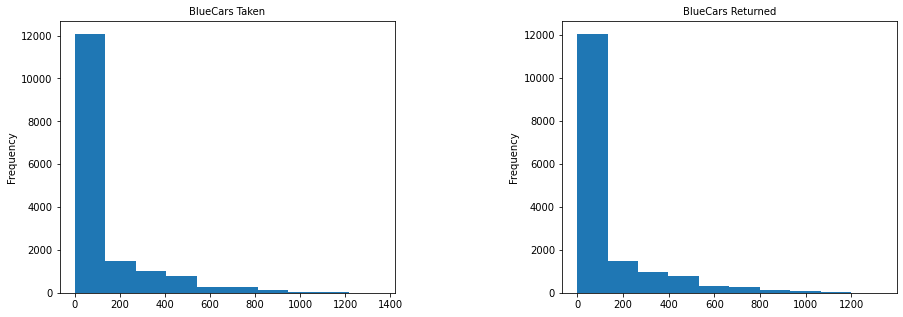

In [ ]:
#This is the distribution plot for sum of bluecars taken
fig, axarr = plt.subplots(1, 2, figsize=(15, 5))
df['BlueCars_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=10).set_title("BlueCars Taken", fontsize=10)
df['BlueCars_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=10 ).set_title("BlueCars Returned", fontsize=10) 
plt.subplots_adjust(wspace=.5)


In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].skew()

BlueCars_taken_sum       2.406355
BlueCars_returned_sum    2.412085
dtype: float64

ii) **Utilib_Taken_sum** & **Utilib_Return_sum**


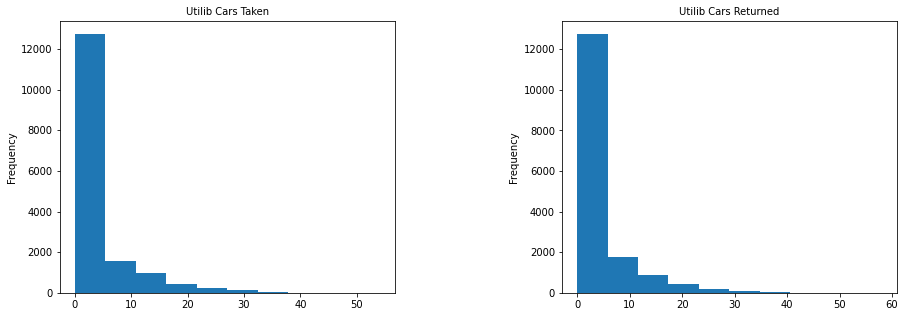

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 5))
df['Utilib_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=10).set_title("Utilib Cars Taken", fontsize=10)
df['Utilib_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=10 ).set_title("Utilib Cars Returned", fontsize=10) 
plt.subplots_adjust(wspace=.5)

In [ ]:
df[['Utilib_taken_sum','Utilib_returned_sum']].skew()

Utilib_taken_sum       2.556872
Utilib_returned_sum    2.578665
dtype: float64

iii) **Utilib_14_Taken_sum** & **Utilib_14_Returned_sum**

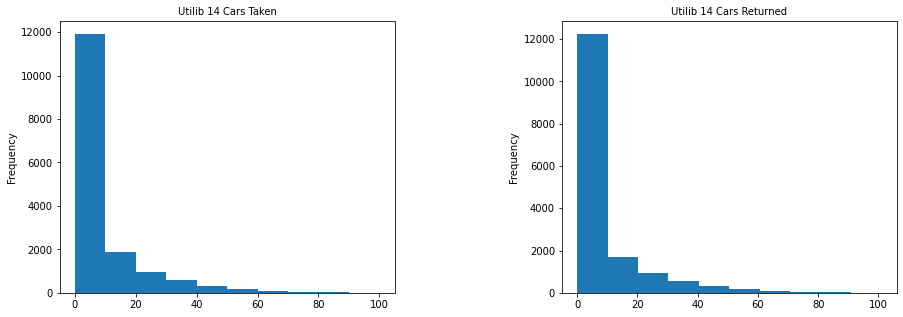

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 5))
df['Utilib_14_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=10).set_title("Utilib 14 Cars Taken", fontsize=10)
df['Utilib_14_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=10 ).set_title("Utilib 14 Cars Returned", fontsize=10) 
plt.subplots_adjust(wspace=.5)

In [ ]:
df[['Utilib_14_taken_sum','Utilib_14_returned_sum']].skew()

Utilib_14_taken_sum       2.510924
Utilib_14_returned_sum    2.511488
dtype: float64

* All columns about the BlueCars, Utilib and Utilib_14 have their data skewed to the left
* The data on num_data_points is skewed to the right
* The data on day_of_week is uniformly skewed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


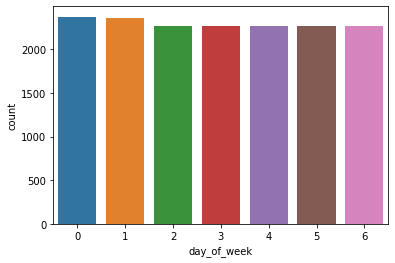

In [ ]:
#Lets plot a graph to find out the count of the days of the week a car is rented
sns.countplot(df['day_of_week'])

 The first two days of the week seems to have the highest records of events happening compared to the rest of the week but there doesnt seem to be a day without a significat amount of activity.

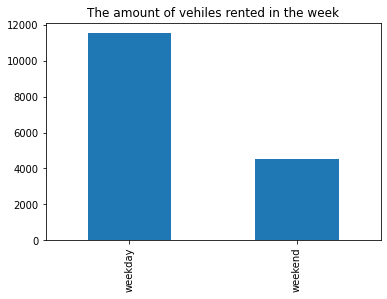

In [ ]:
df['day_type'].value_counts().plot.bar(title='The amount of vehiles rented in the week')

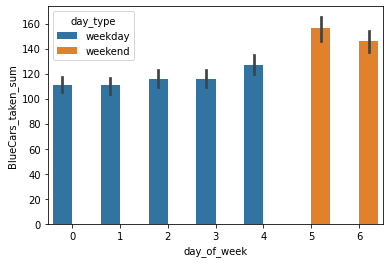

In [ ]:
#Lets create a subplot of the BlueCars_taken_sum
#Top plot we need the day_of_week, and the day_type variables to plot
#For all the Autlib cars below both taken and returned

sns.barplot(x='day_of_week', y='BlueCars_taken_sum', hue ='day_type', data = df)

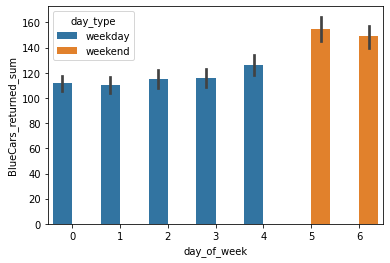

In [ ]:
#Lets create a subplot of the BlueCars_returned_sum
sns.barplot(x='day_of_week', y='BlueCars_returned_sum', hue ='day_type', data = df)

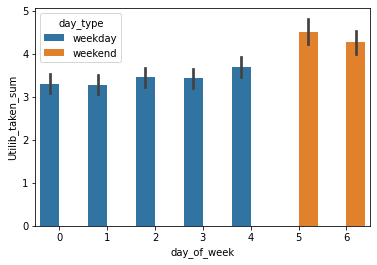

In [ ]:
#Lets create a subplot of the Utilib_taken_sum
sns.barplot(x='day_of_week', y='Utilib_taken_sum', hue ='day_type', data = df)

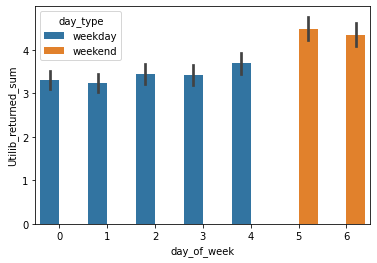

In [ ]:
#Lets create a subplot of the Utilib_returned_sum 
sns.barplot(x='day_of_week', y='Utilib_returned_sum', hue ='day_type', data = df)

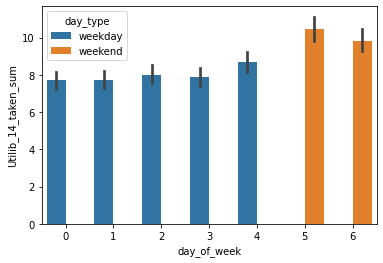

In [ ]:
#Lets create a subplot of the Utilib_14_taken_sum
sns.barplot(x='day_of_week', y='Utilib_14_taken_sum', hue ='day_type', data = df)

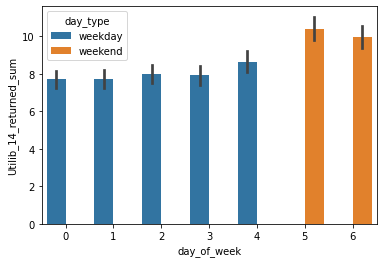

In [ ]:
#Lets create a subplot of the Utilib_14_returned_sum
sns.barplot(x='day_of_week', y='Utilib_14_returned_sum', hue ='day_type', data = df)

##ii) **Bivariate Analysis**

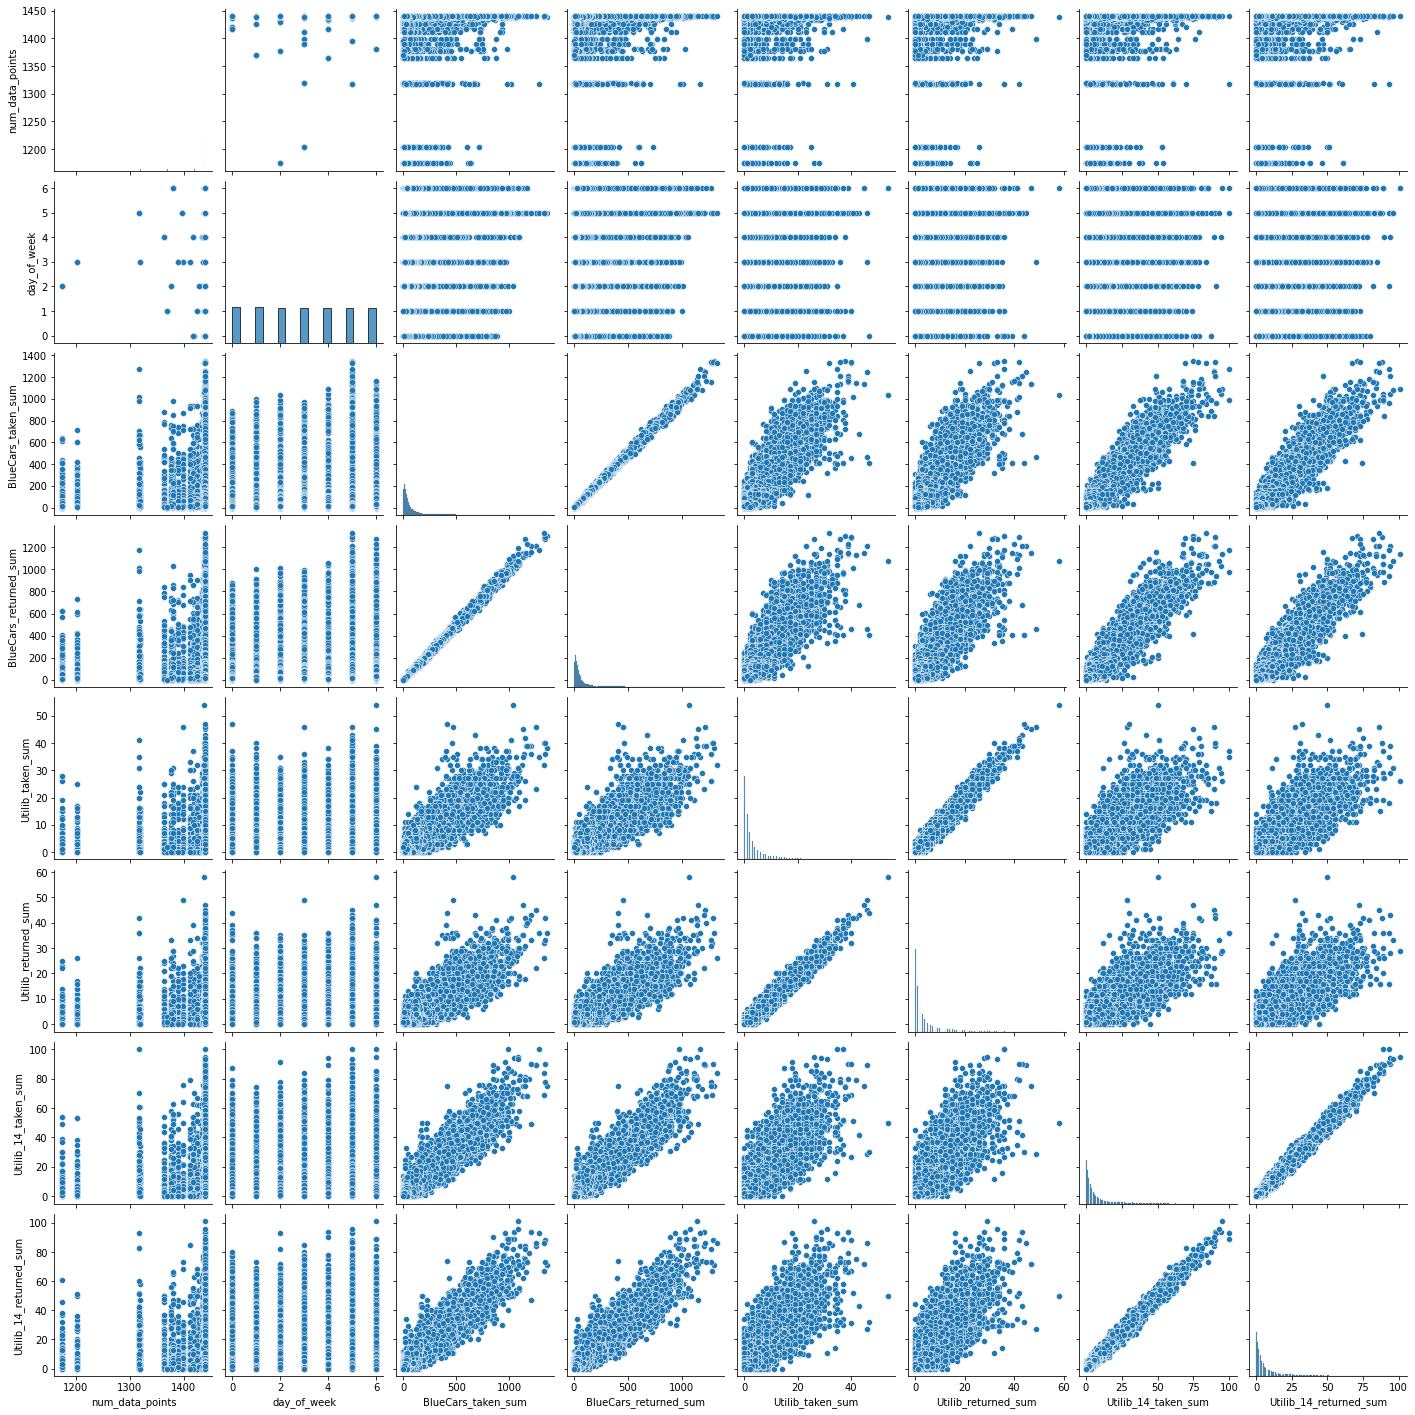

In [ ]:
# plotting our bivariate summaries
sns.pairplot(df[['num_data_points', 'day_of_week', 'BlueCars_taken_sum', 'BlueCars_returned_sum','Utilib_taken_sum',
    'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']])
plt.show()

In [ ]:
#Let us load and find the correlation of our dataset columns
corr = df.corr()
corr

,Postal code,num_data_points,day_of_week,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
num_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
day_of_week,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


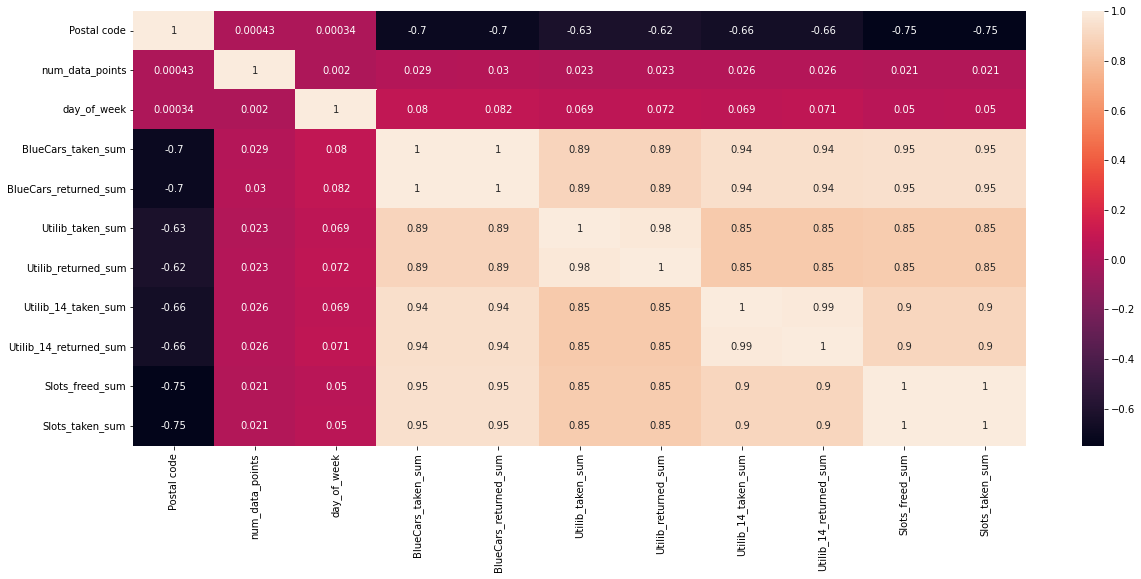

In [ ]:
#Now that we have shown the correlation of the columns we can go further and plot the heatmap for the correlation.
plt.figure(figsize = (20,8))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, annot=True)

**Correlation Matrix Summary**

There is a strong positive correlation between:

* The BlueCars taken and BlueCar returned Variable
* The Utilib taken and Utilib returned variable
* The Utilib_14 taken and the Utilib_14 returned

# 3.**Hypothesis testing**

We have been tasked to understand electric car usage. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

Null Hypothesis - The average number of Autolib electric cars taken is equal to the number of Autolib cars returned on a weekday

Alternative Hypothesis - The average number of Autolib electric cars taken is not equal to the number of Autolib electric cars returned on a weekday

Our p-Value will be 0.05

Ho: u1 = u2

against

Ha: u1 != u2




##i) **Get a Sample**

In [ ]:
#Lets get the mean of the population 
df[['BlueCars_taken_sum', 'BlueCars_returned_sum']].mean()

BlueCars_taken_sum       125.926951
BlueCars_returned_sum    125.912714
dtype: float64

In [ ]:
#Lets calculate the standard deviation of taken vs returned cars

df[['BlueCars_taken_sum', 'BlueCars_returned_sum']].std()

BlueCars_taken_sum       185.426579
BlueCars_returned_sum    185.501535
dtype: float64

In [ ]:
#Before sampling we need to select our data.
#Our focus is on the week days
#Create a new table with only weekday data from our dataset
df.drop(df[df['day_type']== 'Weekend'].index, inplace = True)

In [ ]:
#Lets confim our new data group
df['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [ ]:
#Lets select a sample from our group
Autolib = df.sample(n = 372, replace="False")
Autolib

,Postal code,date,num_data_points,day_of_week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
339,75003,1/28/2018,1440,6,weekend,327,334,13,12,19,19,95,92
11831,93370,1/29/2018,1440,0,weekday,2,0,1,1,0,0,0,0
8884,92400,1/9/2018,1439,1,weekday,98,89,3,2,3,3,3,3
14796,94340,4/28/2018,1440,5,weekend,44,35,1,1,2,2,0,0
3571,78000,6/4/2018,1440,0,weekday,43,51,2,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,92330,3/31/2018,1440,5,weekend,45,49,0,0,3,3,5,5
1069,75007,5/28/2018,1440,0,weekday,299,297,9,7,29,29,94,98
3701,78140,4/28/2018,1440,5,weekend,31,28,0,0,1,1,0,0
4836,92120,1/4/2018,1320,3,weekday,79,78,1,1,4,3,0,0


In [ ]:
#Calculate the sample mean()
df[['BlueCars_taken_sum', 'BlueCars_returned_sum']].mean()

BlueCars_taken_sum       125.926951
BlueCars_returned_sum    125.912714
dtype: float64

In [ ]:
#Calculate the Standard deviation
df[['BlueCars_taken_sum', 'BlueCars_returned_sum']].std()

BlueCars_taken_sum       185.426579
BlueCars_returned_sum    185.501535
dtype: float64

##ii) **Performing the Tests**

In [122]:
#BlueCars_taken_sum 
zscore = (137.54 - 125.93)/194.43
zscore



0.05971300725196721

In [ ]:
#BlueCars_Return_sum 
zscore = (136.70 - 125.91)/192.83
zscore

prob = stats.norm.cdf(zscore)
prob

0.5223115797756462

The Z scores give us a probability of 0.52 which means we have no enough statistical evidence to reject the null hypothesis therefore we accept it

##iii) **Conclusions Made**

* From the given data and tests done we can conclude that the Weekdays are the peek days for most Autolib cars taken and returned.

* There is also a strong correlation between the all the electric cars taken and the electric cars returned

* We can confidently say from our analysis the average number of electric cars taken equals the average number of electric cars returned.
